# Análise Descritiva

## Informações iniciais

Informações sobre os datasets https://www.imdb.com/interfaces/

Baixar os tsvs no link https://datasets.imdbws.com/ e colocar na mesma pasta do arquivo ipynb

## 1) Leitura dos datasets
- Limpeza
    - NaN
    - Filmes sem startYear
    - Trabalharemos apenas com os filmes na língua original, então isOriginalTitle = 1
    - Excluímos os filmes com isAdult = 1

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy.stats.mstats import hmean

plt.style.use('ggplot')

In [3]:
name_basics = "name.basics.tsv"
nb_columns = ['nconst', 'primaryName', 'birthYear', 'deathYear', 'primaryProfession','knownForTitles']

nb_df = pd.read_csv(name_basics,sep='\t',header=0,usecols=nb_columns)
nb_df.dropna()
nb_df.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0050419,tt0031983,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0071877,tt0038355,tt0117057,tt0037382"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0057345,tt0049189,tt0054452,tt0056404"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0072562,tt0077975,tt0080455"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0083922,tt0069467,tt0060827"


In [4]:
title_akas = "title.akas.tsv"
ta_columns = ['titleId', 'ordering', 'title', 'region', 'language', 'types', 'attributes', 'isOriginalTitle']
convert_dict = {'titleId': str, 'ordering': int, 'title': str, 
                'region': str, 'language': str, 'types': str, 'attributes': str, 'isOriginalTitle': str}

ta_df = pd.read_csv(title_akas,sep='\t',header=0,usecols=ta_columns,dtype=convert_dict)
ta_df = ta_df[ta_df['isOriginalTitle'] == '1']
ta_df.rename(columns={'titleId':'tconst'}, inplace=True)
ta_df.dropna()
ta_df.head()

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle
6,tt0000001,7,Carmencita,\N,\N,original,\N,1
8,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1
21,tt0000003,6,Pauvre Pierrot,\N,\N,original,\N,1
25,tt0000004,1,Un bon bock,\N,\N,original,\N,1
34,tt0000005,11,Blacksmith Scene,\N,\N,original,\N,1


In [8]:
title_basics = "title.basics.tsv"
tb_columns = ['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'startYear', 'isAdult', 'endYear', 'runtimeMinutes', 'genres']
convert_dict = {'tconst': str, 'titleType': str, 'primaryTitle': str, 'originalTitle': str, 
                'startYear': str, 'isAdult': object,'endYear': str, 'runtimeMinutes': str, 'genres': object}

tb_df = pd.read_csv(title_basics,sep='\t',header=0,usecols=tb_columns,dtype=convert_dict)
tb_df.dropna()
tb_df = tb_df[~tb_df['genres'].str.contains('N', na=False)]
tb_df = tb_df[~tb_df['startYear'].str.contains("N", na=False)]
tb_df = tb_df[~tb_df['isAdult'].str.contains("N", na=False)]
tb_df = tb_df[tb_df['isAdult'].astype(int) == 0]
tb_df = (tb_df.drop(columns='genres').join(tb_df['genres'].str.get_dummies(sep=',')))
tb_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,Action,Adult,...,Mystery,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,0,0,...,0,0,0,0,1,0,0,0,0,0
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,0,0,...,0,0,1,0,0,0,0,0,0,0
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,0,0,...,0,0,0,0,1,0,0,0,0,0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
title_crew = "title.crew.tsv"
tc_columns = ['tconst', 'directors', 'writers']
tc_df = pd.read_csv(title_crew,sep='\t',header=0,usecols=tc_columns)
tc_df.dropna()
tc_df.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [10]:
title_episode = "title.episode.tsv"
te_columns = ['tconst', 'parentTconst', 'seasonNumber', 'episodeNumber']

te_df = pd.read_csv(title_episode,sep='\t',header=0,usecols=te_columns)
te_df.dropna()
te_df.head()

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0020666,tt15180956,1,2
1,tt0020829,tt15180956,1,1
2,tt0021166,tt15180956,1,3
3,tt0021612,tt15180956,2,2
4,tt0021655,tt15180956,2,5


In [11]:
title_principals = "title.principals.tsv"
tp_columns = ['tconst', 'ordering', 'nconst', 'category', 'job', 'characters']

tp_df = pd.read_csv(title_principals,sep='\t',header=0,usecols=tp_columns)
tp_df.dropna()
tp_df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


In [12]:
title_ratings = "title.ratings.tsv"
tr_columns = ['tconst', 'averageRating', 'numVotes']

tr_df = pd.read_csv(title_ratings,sep='\t',header=0,usecols=tr_columns)
tr_df.dropna()
tr_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1914
1,tt0000002,5.8,259
2,tt0000003,6.5,1720
3,tt0000004,5.6,172
4,tt0000005,6.2,2537


## 2) Merge datasets

### title.akas + title.basics

In [13]:
ta_tb_df = pd.merge(ta_df, tb_df,how='outer', on='tconst')
ta_tb_df.head()

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,...,Mystery,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,tt0000001,7.0,Carmencita,\N,\N,original,\N,1,short,Carmencita,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,tt0000002,1.0,Le clown et ses chiens,\N,\N,original,\N,1,short,Le clown et ses chiens,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,tt0000003,6.0,Pauvre Pierrot,\N,\N,original,\N,1,short,Pauvre Pierrot,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tt0000004,1.0,Un bon bock,\N,\N,original,\N,1,short,Un bon bock,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,tt0000005,11.0,Blacksmith Scene,\N,\N,original,\N,1,short,Blacksmith Scene,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### title.akas + title.basics + title.ratings

In [114]:
ta_tb_tr_df = pd.merge(ta_tb_df, tr_df,how='outer', on='tconst')
ta_tb_tr_df .dropna(how='any', inplace=True)
ta_tb_tr_df.head()

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Game-Show,History,Horror,Music,Musical,Mystery,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,averageRating,numVotes
0,tt0000001,7.0,Carmencita,\N,\N,original,\N,1,short,Carmencita,Carmencita,0,1894,\N,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.7,1914.0
1,tt0000002,1.0,Le clown et ses chiens,\N,\N,original,\N,1,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.8,259.0
2,tt0000003,6.0,Pauvre Pierrot,\N,\N,original,\N,1,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.5,1720.0
3,tt0000004,1.0,Un bon bock,\N,\N,original,\N,1,short,Un bon bock,Un bon bock,0,1892,\N,12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.6,172.0
4,tt0000005,11.0,Blacksmith Scene,\N,\N,original,\N,1,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.2,2537.0


### name.basics + title.crew + title.ratings -> Directors

In [14]:
nb_tc_df = pd.merge(nb_df, tc_df, left_on='nconst', right_on='directors')
nb_tc_df = nb_tc_df.drop(['directors', 'knownForTitles','writers'], axis=1)
nb_tc_tr_df = pd.merge(nb_tc_df, tr_df, how='outer', on='tconst')
nb_tc_tr_df = pd.merge(nb_tc_tr_df, tb_df, how='outer', on='tconst')
nb_tc_tr_df = nb_tc_tr_df[nb_tc_tr_df['titleType'] == 'movie']
nb_tc_tr_df = nb_tc_tr_df[['nconst', 'primaryName','birthYear','deathYear','primaryProfession','averageRating', 'numVotes', 'tconst']]
nb_tc_tr_df.dropna(how='any', inplace=True)
nb_tc_tr_df.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,averageRating,numVotes,tconst
0,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor",6.6,1545.0,tt0038468
1,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor",6.4,3161.0,tt0038675
2,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor",6.5,1902.0,tt0039834
3,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor",6.6,2497.0,tt0040418
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor",6.4,1359.0,tt0040622


### name.basics + title.crew + title.ratings -> Writers

In [219]:
w_nb_tc_df = pd.merge(nb_df, tc_df, left_on='nconst', right_on='writers')
w_nb_tc_df = w_nb_tc_df.drop(['directors', 'knownForTitles','writers'], axis=1)
w_nb_tc_tr_df = pd.merge(w_nb_tc_df, tr_df, how='outer', on='tconst')
w_nb_tc_tr_df = pd.merge(w_nb_tc_tr_df, tb_df, how='outer', on='tconst')
w_nb_tc_tr_df = w_nb_tc_tr_df[w_nb_tc_tr_df['titleType'] == 'movie']
w_nb_tc_tr_df = w_nb_tc_tr_df[['nconst', 'primaryName','birthYear','deathYear','primaryProfession','averageRating', 'numVotes', 'tconst']]
w_nb_tc_tr_df.dropna(how='any', inplace=True)
w_nb_tc_tr_df.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,averageRating,numVotes,tconst
0,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor",7.3,3545.0,tt0036914
1,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor",6.8,1956.0,tt0041399
2,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor",7.2,3066.0,tt0043048
3,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor",7.5,6863.0,tt0045848
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor",7.0,3458.0,tt0047167


## 3) Perguntas

#### 1- Quais foram os gêneros de filmes mais produzidos em cada década?

In [112]:
only_movies = ta_tb_df[ta_tb_df['titleType'] == 'movie']
movies_by_decade = only_movies.groupby(only_movies['startYear'].astype(int)//10*10).size().reset_index()
movies_by_decade.rename(columns={'startYear':'Decade', 0: 'Movie Count'}, inplace=True)
movies_by_decade.head(14)

,Decade,Movie Count
0,1890,15
1,1900,101
2,1910,8491
3,1920,13751
4,1930,16233
5,1940,11454
6,1950,18045
7,1960,25526
8,1970,29062
9,1980,31855


In [21]:
genres_list = list(only_movies.columns[15:len(only_movies.columns)])
genres_by_decade = only_movies.groupby(only_movies['startYear'].astype(int)//10*10)[genres_list].sum().reset_index()
genres_by_decade.rename(columns={'startYear':'Decade'}, inplace=True)
combine =  pd.merge(movies_by_decade, genres_by_decade,how='outer', on='Decade')
for index, row in combine.iterrows():
    for genre in genres_list:
        combine.at[index,genre] = 100*row[genre]/row['Movie Count']
pd.set_option("display.max_columns", None)
combine = combine.drop('Movie Count', axis=1)
combine.head(14)

,Decade,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Game-Show,History,Horror,Music,Musical,Mystery,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,1890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,93.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.666667,0.000000,0.000000,6.666667,0.000000,0.000000,0.000000,0.000000
1,1900,0.990099,0.000000,2.970297,0.000000,3.960396,5.940594,0.000000,66.336634,19.801980,0.990099,1.980198,0.000000,2.970297,0.990099,1.980198,2.970297,0.000000,0.000000,0.990099,0.000000,0.000000,5.940594,0.000000,0.000000,4.950495,0.000000
2,1910,2.802968,0.000000,3.933577,0.058886,0.600636,15.322106,8.220469,5.111294,71.393240,0.188435,0.989283,0.000000,1.860794,0.765516,0.094217,0.047109,2.520316,0.000000,7.631610,0.341538,0.000000,0.447533,0.000000,1.118832,3.050289,4.169120
3,1920,5.090539,0.000000,6.065013,0.159988,0.559959,16.616973,5.228711,5.868664,61.900953,0.472693,0.734492,0.000000,1.592611,0.676314,0.283616,0.552687,2.174387,0.007272,11.497346,0.225438,0.007272,0.872664,0.000000,0.887208,1.229002,10.115628
4,1930,4.946713,0.000000,5.137682,0.184809,0.720754,26.230518,8.852338,8.858498,53.200271,1.336783,0.850120,0.000000,1.570874,0.880922,2.088339,6.468305,3.394320,0.000000,15.271361,0.400419,0.006160,0.868601,0.000000,1.047249,2.100659,6.086367
5,1940,6.076480,0.000000,6.984460,0.628601,1.728654,30.199057,7.831325,5.439148,49.764274,3.125546,1.990571,0.000000,2.470753,1.353239,3.937489,7.159071,4.085909,0.000000,14.981666,0.419068,0.008731,0.654793,0.000000,2.008032,6.731273,9.263140
6,1950,6.522582,0.000000,7.653089,0.421169,1.778886,25.990579,8.639512,6.201164,53.543918,3.945691,2.826268,0.000000,2.615683,1.817678,2.039346,6.855085,2.272098,0.005542,13.760044,1.429759,0.000000,0.786922,0.000000,2.671100,4.095317,4.793572
7,1960,12.309018,0.031341,9.249393,0.548460,1.053827,23.160699,10.930032,6.863590,49.627830,3.416125,2.628692,0.000000,2.264358,2.554258,1.140014,5.241714,2.742302,0.003918,12.908407,1.363316,0.023505,0.560213,0.000000,4.168299,4.340672,3.502311
8,1970,13.839378,0.055055,8.106806,0.856789,1.527768,22.080380,9.882321,11.248366,48.719978,3.932971,2.680476,0.000000,2.150575,4.239213,1.489918,2.773381,2.594453,0.010323,10.284908,1.431422,0.006882,0.908403,0.006882,5.140734,2.580690,2.009497
9,1980,15.231518,0.091038,5.581541,1.503689,1.792497,21.801915,8.080364,12.666771,49.229320,3.999372,3.296186,0.000000,1.921205,5.223670,2.184900,2.144090,2.483127,0.009418,9.436509,2.216293,0.000000,0.759692,0.003139,5.973944,2.555329,0.392403


Text(0.5, 0, 'Decade')

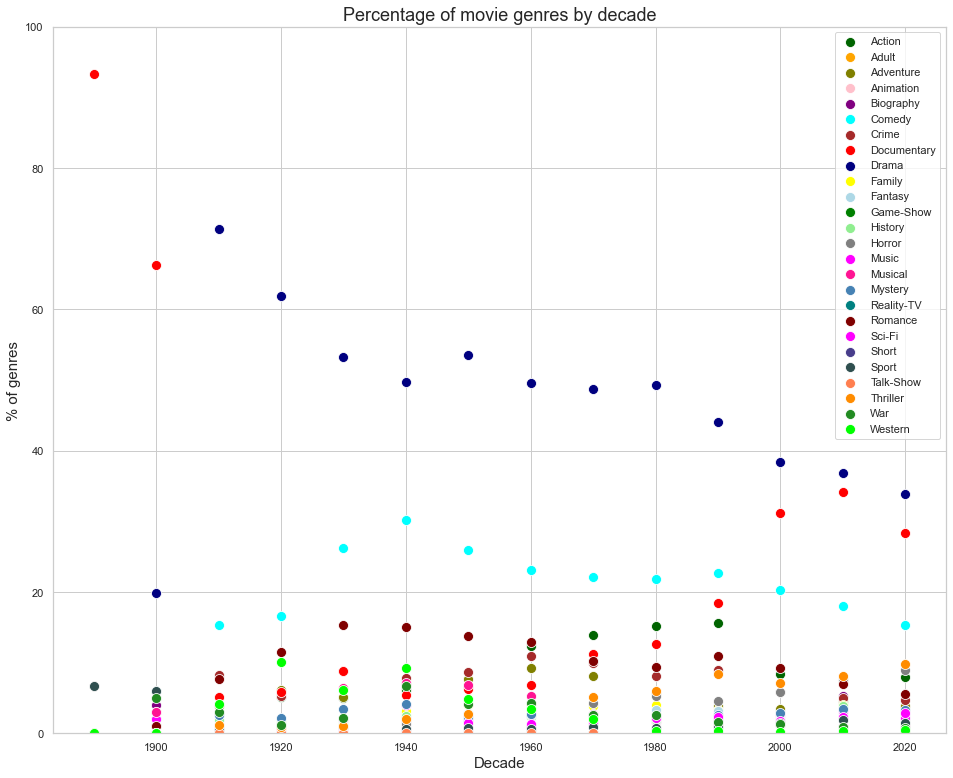

In [22]:
sns.set(rc={'figure.figsize':(16,13)})
sns.set_style("whitegrid")
plt.ylim(0, 100)
color_list = ['darkgreen','orange','olive','pink','purple','aqua',
              'brown','red','navy','yellow','lightblue','green',
              'lightgreen','grey','fuchsia','deeppink','steelblue','teal',
              'maroon','magenta','darkslateblue','darkslategray','coral',
              'darkorange','forestgreen','lime']
for key,genre in enumerate(genres_list):
    color = color_list[key]
    g = sns.scatterplot(data=combine, x='Decade', y=genre, label=genre, color=color, s=100)
g.set_title('Percentage of movie genres by decade', fontsize=18)
g.set_ylabel('% of genres',labelpad=None, fontsize=15)
g.set_xlabel('Decade',labelpad=None, fontsize=15)

#### 2 - Quais são os 10 diretores de filme mais aclamados?

- Critério:
    - Diretores com pelo menos 11 filmes, cada um com mais de 8500 votos

In [212]:
import scipy.stats as stats

directors =  nb_tc_tr_df[nb_tc_tr_df['numVotes'] > 8500.0]
directors = directors.groupby('nconst').filter(lambda x : len(x)>10)
directors = directors[~directors['birthYear'].str.contains("N", na=False)]
directors.dropna(how='any', inplace=True)

data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

x_bar = directors['averageRating'].mean()
SSTR = directors.groupby('nconst').count() * (directors.groupby('nconst').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['averageRating'].sum()

SSE = (directors.groupby('nconst').count() - 1) * directors.groupby('nconst').std()**2
anova_table['SS']['Within Groups'] = SSE['averageRating'].sum()

SSTR = SSTR['averageRating'].sum() + SSE['averageRating'].sum()
anova_table['SS']['Total'] = SSTR

anova_table['df']['Between Groups'] = directors['nconst'].nunique() - 1
anova_table['df']['Within Groups'] = directors.shape[0] - directors['nconst'].nunique()
anova_table['df']['Total'] = directors.shape[0] - 1

anova_table['MS'] = anova_table['SS'] / anova_table['df']

F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

alpha = 0.05

tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,408.722606,101,4.046758,7.65694,0.0,1.307964
Within Groups,772.679542,1462,0.528509,,,
Total,1181.402148,1563,0.755856,,,


In [213]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 7.6569400003808425  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 7.6569400003808425  and critical value is: 1.3079643819255107
Null Hypothesis is rejected.


In [214]:
directors_mean = directors.groupby(directors['nconst'])['averageRating'].mean().round(3).reset_index()
directors_mean.rename(columns={'averageRating': 'meanRating'}, inplace=True)
directors_mean = pd.merge(nb_tc_tr_df, directors_mean, how='inner', on='nconst')
directors_mean = directors_mean.drop(['tconst', 'averageRating', 'numVotes'], axis=1)
directors_mean.drop_duplicates(subset=['nconst'], keep='first', inplace=True)
directors_mean['rank'] = directors_mean['meanRating'].rank(method='dense',ascending=False).astype(int)
top_ten_directors = directors_mean.sort_values(by=['rank'], ascending=True).head(10)
top_ten_directors.head(10)

,nconst,primaryName,birthYear,deathYear,primaryProfession,meanRating,rank
95,nm0000041,Akira Kurosawa,1910,1998,"writer,director,assistant_director",8.157,1
2032,nm0634240,Christopher Nolan,1970,\N,"writer,producer,director",8.155,2
422,nm0000233,Quentin Tarantino,1963,\N,"writer,actor,producer",8.073,3
2020,nm0594503,Hayao Miyazaki,1941,\N,"animation_department,director,art_department",7.973,4
0,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor",7.906,5
84,nm0000040,Stanley Kubrick,1928,1999,"writer,director,producer",7.864,6
2150,nm0943758,William Wyler,1902,1981,"director,producer,actor",7.750,7
632,nm0000399,David Fincher,1962,\N,"producer,director,actor",7.664,8
1392,nm0001392,Peter Jackson,1961,\N,"producer,director,writer",7.614,9
985,nm0000697,Billy Wilder,1906,2002,"writer,director,producer",7.592,10


Text(0, 0.5, 'Name')

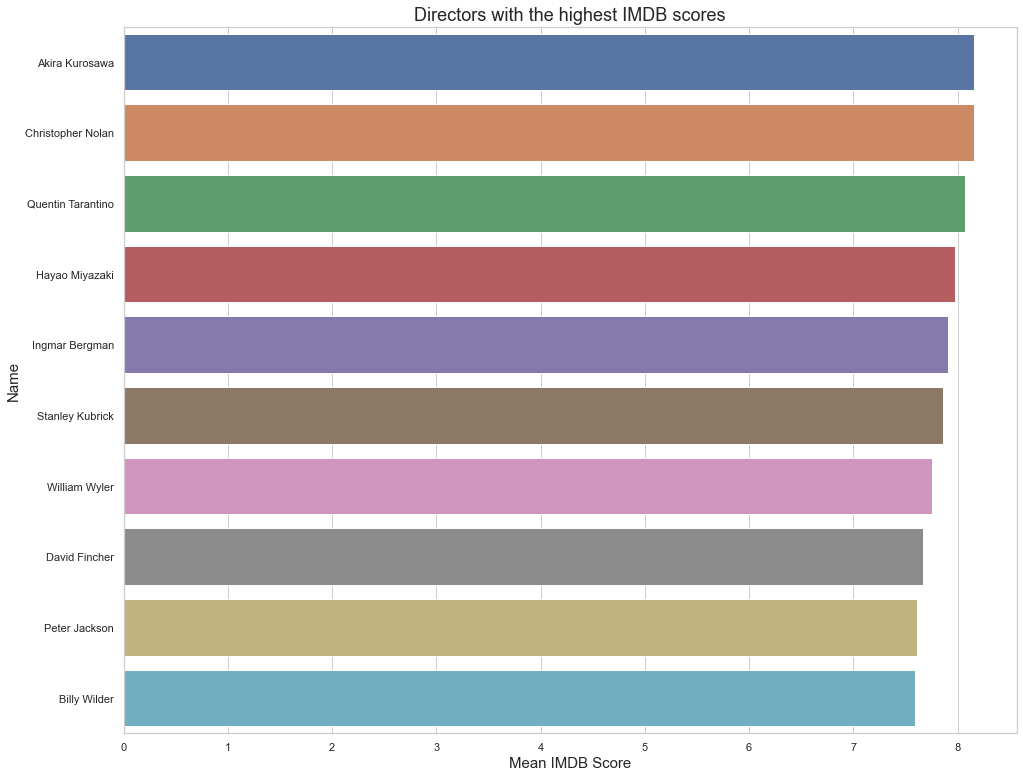

In [184]:
ax = sns.barplot(x='meanRating', y='primaryName', data=top_ten_directors)

ax.set_title('Directors with the highest IMDB scores', fontsize=18)
ax.set_xlabel('Mean IMDB Score', fontsize=15)
ax.set_ylabel('Name', fontsize=15)

#### 3 - Quais são os 10 filmes mais votados?

In [121]:
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

only_movies_votes = ta_tb_tr_df[ta_tb_tr_df['titleType'] == 'movie']
only_movies_votes['rank'] = only_movies_votes['numVotes'].rank(method='dense',ascending=False).astype(int)
only_movies_votes.head()
top_ten_movie_votes = only_movies_votes.sort_values(by=['rank'], ascending=True).head(10)
top_ten_movie_votes.head(10)

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Game-Show,History,Horror,Music,Musical,Mystery,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,averageRating,numVotes,rank
105121,tt0111161,16.0,The Shawshank Redemption,\N,\N,original,\N,1,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.3,2647441.0,1
395477,tt0468569,20.0,The Dark Knight,\N,\N,original,\N,1,movie,The Dark Knight,The Dark Knight,0,2008,\N,152,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2619387.0,2
756285,tt1375666,40.0,Inception,\N,\N,original,\N,1,movie,Inception,Inception,0,2010,\N,148,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.8,2321526.0,3
128376,tt0137523,51.0,Fight Club,\N,\N,original,\N,1,movie,Fight Club,Fight Club,0,1999,\N,139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.8,2092324.0,4
103903,tt0109830,38.0,Forrest Gump,\N,\N,original,\N,1,movie,Forrest Gump,Forrest Gump,0,1994,\N,142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.8,2050007.0,5
104888,tt0110912,62.0,Pulp Fiction,\N,\N,original,\N,1,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.9,2026137.0,6
124479,tt0133093,14.0,The Matrix,\N,\N,original,\N,1,movie,The Matrix,The Matrix,0,1999,\N,136,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.7,1893185.0,7
113614,tt0120737,9.0,The Lord of the Rings: The Fellowship of the Ring,\N,\N,original,\N,1,movie,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,0,2001,\N,178,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.8,1849606.0,8
66102,tt0068646,28.0,The Godfather,\N,\N,original,\N,1,movie,The Godfather,The Godfather,0,1972,\N,175,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2,1835154.0,9
154061,tt0167260,53.0,The Lord of the Rings: The Return of the King,\N,\N,original,\N,1,movie,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,0,2003,\N,201,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1823297.0,10


Text(0, 0.5, 'Title')

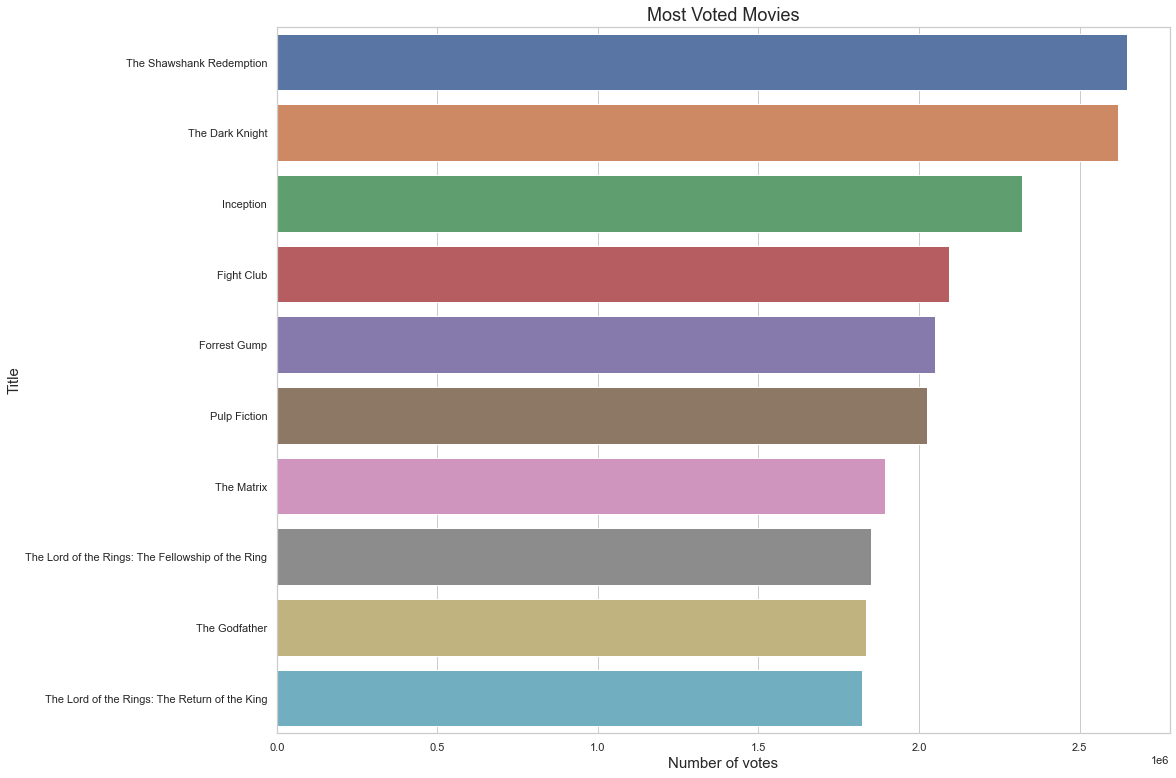

In [129]:
ax2 = sns.barplot(x='numVotes', y='title', data=top_ten_movie_votes)
ax2.set_title('Most Voted Movies', fontsize=18)
ax2.set_xlabel('Number of votes', fontsize=15)
ax2.set_ylabel('Title', fontsize=15)

#### 4- Quais são os 7 escritores de filmes mais aclamados?

In [262]:
writers =  w_nb_tc_tr_df[w_nb_tc_tr_df['numVotes'] > 8500.0]
writers = writers.groupby('nconst').filter(lambda x : len(x)>10)
writers = writers[~writers['birthYear'].str.contains("N", na=False)]
writers.dropna(how='any', inplace=True)

writers_mean = writers.groupby(writers['nconst'])['averageRating'].mean().round(3).reset_index()
writers_mean.rename(columns={'averageRating': 'meanRating'}, inplace=True)
writers_mean = pd.merge(w_nb_tc_tr_df, writers_mean, how='inner', on='nconst')
writers_mean = writers_mean.drop(['tconst', 'averageRating', 'numVotes'], axis=1)
writers_mean.drop_duplicates(subset=['nconst'], keep='first', inplace=True)
writers_mean['rank'] = writers_mean['meanRating'].rank(method='dense',ascending=False).astype(int)
top_ten_writers = writers_mean.sort_values(by=['rank'], ascending=True).head(10)
top_ten_writers.head(10)

,nconst,primaryName,birthYear,deathYear,primaryProfession,meanRating,rank
0,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor",7.921,1
86,nm0000264,Pedro Almodóvar,1949,\N,"writer,director,soundtrack",7.138,2
30,nm0000095,Woody Allen,1935,\N,"writer,director,actor",6.949,3
102,nm0000455,John Hughes,1950,2009,"writer,producer,director",6.737,4
72,nm0000108,Luc Besson,1959,\N,"writer,producer,director",6.717,5
123,nm0003620,Kevin Smith,1970,\N,"producer,actor,writer",6.433,6
137,nm1347153,Tyler Perry,1969,\N,"director,writer,producer",5.100,7


Text(0, 0.5, 'Name')

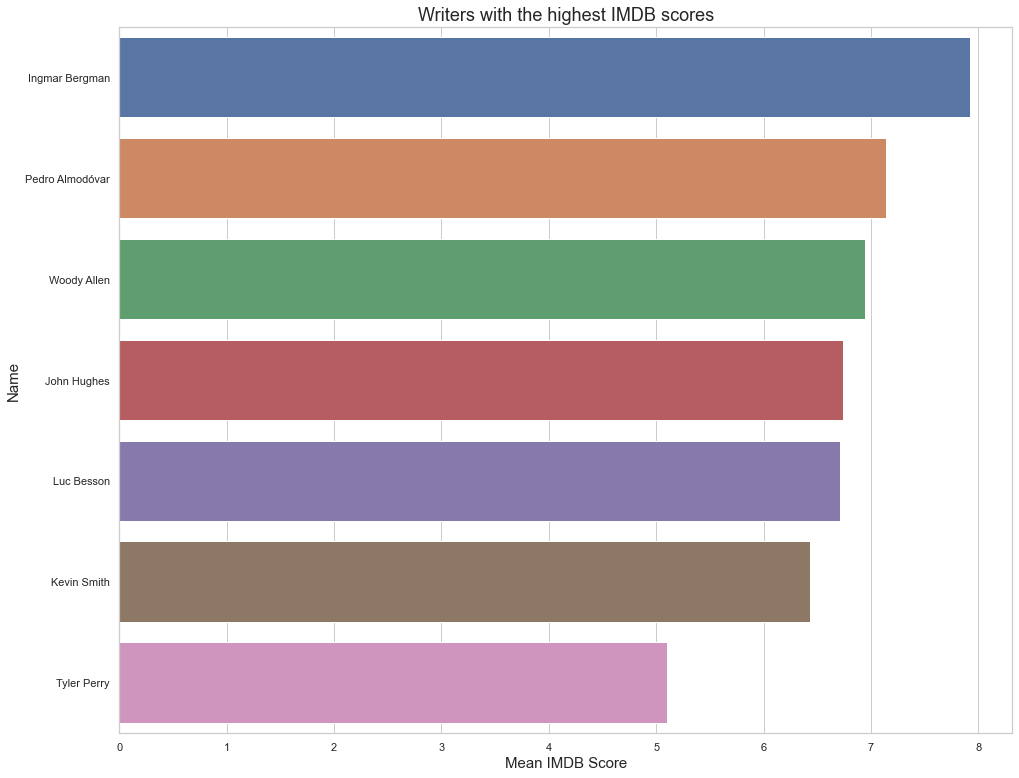

In [264]:
ax3 = sns.barplot(x='meanRating', y='primaryName', data=top_ten_writers)

ax3.set_title('Writers with the highest IMDB scores', fontsize=18)
ax3.set_xlabel('Mean IMDB Score', fontsize=15)
ax3.set_ylabel('Name', fontsize=15)

#### 5 - Número de filmes por ano

In [331]:
only_movies = ta_tb_df[ta_tb_df['titleType'] == 'movie']
movies_by_year = only_movies.groupby(only_movies['startYear']).size().reset_index()
movies_by_year.rename(columns={'startYear':'Year', 0: 'Movie Count'}, inplace=True)
movies_by_year.head(126)

,Year,Movie Count
0,1894,1
1,1896,1
2,1898,7
3,1899,6
4,1900,5
...,...,...
121,2017,17524
122,2018,17648
123,2019,17260
124,2020,14929


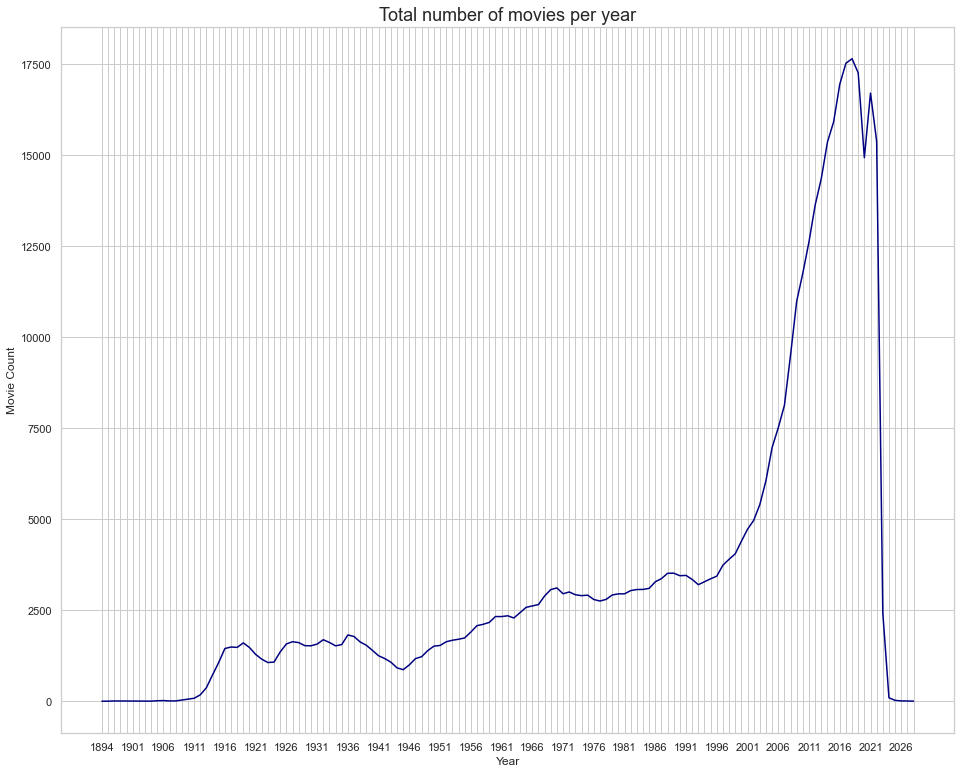

In [325]:
m = sns.lineplot(data=movies_by_year, x='Year', y='Movie Count', color='navy')
m.set_title('Total number of movies per year', fontsize=18)

for ind, label in enumerate(m.get_xticklabels()):
    if ind % 5 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)